## 2.2) Supervised Segmentation
A U-Net is trained here to perform a semantic segmentation of laser points in the LASTEN data set.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils

import tensorflow as tf
import numpy as np
import segmentation_models as sm

from unet import UNet
from unet import preprocess_input as pre_une
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from sklearn.model_selection import train_test_split
from segmentation_models.losses import dice_loss
from segmentation_models.metrics import iou_score
from lastengen import LASTENSequence
from matplotlib import pyplot as plt

Segmentation Models: using `tf.keras` framework.


# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.list_physical_devices('GPU')

2.0.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data
Import training images

In [3]:
path_train = r'D:\LASTEN\train'
path_validation = r'D:\LASTEN\validation'
path_test = r'D:\LASTEN\test'

#path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/train'
#path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'
#path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/test'

width = 384 #768
height = 384 #768

# Seeding
Seeds are set to ensure reproducible training.

In [4]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [5]:
model = UNet(filters=48, input_shape=(height, width, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 384, 384, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 384, 384, 48) 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 384, 384, 48) 192         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 384, 384, 48) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Data Preparation
The generator sequence for training is built.

In [6]:
image_ids = None

train_gen = LASTENSequence(path_train,
                           batch_size=8,
                           image_ids=image_ids,
                           preprocess_input=pre_une,
                           shuffle=True,
                           augment=True,
                           width=width,
                           height=height)

validation_gen = LASTENSequence(path_validation,
                                batch_size=8,
                                preprocess_input=pre_une,
                                width=width,
                                height=height)

#test_gen = LASTENSequence(path_train,
#                          batch_size=8,
#                          preprocess_input=pre_une,
#                          width=width,
#                          height=height)

# Training Preparation
Prepare the settings for training the model.

In [7]:
save_path = "experiments/2_2_segmentation"

logger = CSVLogger(save_path + "/result.log")
checker = ModelCheckpoint(save_path + "/weights.{epoch:02d}.hdf5",
                          period=10)

callbacks = [logger, checker]

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics = ['accuracy', iou_score])

# Training
The model is fitted with a generator.

In [8]:
model.fit_generator(train_gen,
                    epochs=300,
                    callbacks=callbacks,
                    validation_data=validation_gen,
                    validation_freq=1,
                    use_multiprocessing=True,
                    workers=10,
                    max_queue_size=32)

Epoch 1/300
21/21 [==============================] - 44s 2s/step - loss: 0.8409 - accuracy: 0.8682 - iou_score: 0.0874 - val_loss: 0.9622 - val_accuracy: 0.0192 - val_iou_score: 0.0193
Epoch 2/300
21/21 [==============================] - 28s 1s/step - loss: 0.7300 - accuracy: 0.9576 - iou_score: 0.1562 - val_loss: 0.9622 - val_accuracy: 0.0192 - val_iou_score: 0.0193
Epoch 3/300
21/21 [==============================] - 28s 1s/step - loss: 0.6264 - accuracy: 0.9746 - iou_score: 0.2301 - val_loss: 0.9622 - val_accuracy: 0.0192 - val_iou_score: 0.0193
Epoch 4/300
21/21 [==============================] - 28s 1s/step - loss: 0.5343 - accuracy: 0.9808 - iou_score: 0.3041 - val_loss: 0.9622 - val_accuracy: 0.0192 - val_iou_score: 0.0193
Epoch 5/300
21/21 [==============================] - 28s 1s/step - loss: 0.4492 - accuracy: 0.9849 - iou_score: 0.3806 - val_loss: 0.9643 - val_accuracy: 0.0577 - val_iou_score: 0.0182
Epoch 6/300
21/21 [==============================] - 28s 1s/step - loss: 0.

21/21 [==============================] - 29s 1s/step - loss: 0.2675 - accuracy: 0.9894 - iou_score: 0.5781 - val_loss: 0.2224 - val_accuracy: 0.9918 - val_iou_score: 0.6364
Epoch 46/300
21/21 [==============================] - 28s 1s/step - loss: 0.2707 - accuracy: 0.9893 - iou_score: 0.5742 - val_loss: 0.2061 - val_accuracy: 0.9919 - val_iou_score: 0.6586
Epoch 47/300
21/21 [==============================] - 29s 1s/step - loss: 0.2629 - accuracy: 0.9896 - iou_score: 0.5839 - val_loss: 0.2060 - val_accuracy: 0.9918 - val_iou_score: 0.6586
Epoch 48/300
21/21 [==============================] - 28s 1s/step - loss: 0.2690 - accuracy: 0.9893 - iou_score: 0.5761 - val_loss: 0.2091 - val_accuracy: 0.9915 - val_iou_score: 0.6544
Epoch 49/300
21/21 [==============================] - 29s 1s/step - loss: 0.2687 - accuracy: 0.9893 - iou_score: 0.5767 - val_loss: 0.2097 - val_accuracy: 0.9917 - val_iou_score: 0.6535
Epoch 50/300
21/21 [==============================] - 29s 1s/step - loss: 0.2673 - 

21/21 [==============================] - 29s 1s/step - loss: 0.2628 - accuracy: 0.9895 - iou_score: 0.5839 - val_loss: 0.2035 - val_accuracy: 0.9921 - val_iou_score: 0.6621
Epoch 90/300
21/21 [==============================] - 29s 1s/step - loss: 0.2578 - accuracy: 0.9898 - iou_score: 0.5901 - val_loss: 0.2019 - val_accuracy: 0.9918 - val_iou_score: 0.6643
Epoch 91/300
21/21 [==============================] - 28s 1s/step - loss: 0.2600 - accuracy: 0.9896 - iou_score: 0.5875 - val_loss: 0.1973 - val_accuracy: 0.9920 - val_iou_score: 0.6708
Epoch 92/300
21/21 [==============================] - 28s 1s/step - loss: 0.2537 - accuracy: 0.9899 - iou_score: 0.5954 - val_loss: 0.2007 - val_accuracy: 0.9919 - val_iou_score: 0.6660
Epoch 93/300
21/21 [==============================] - 28s 1s/step - loss: 0.2576 - accuracy: 0.9898 - iou_score: 0.5905 - val_loss: 0.1976 - val_accuracy: 0.9920 - val_iou_score: 0.6703
Epoch 94/300
21/21 [==============================] - 28s 1s/step - loss: 0.2601 - 

Epoch 133/300
21/21 [==============================] - 27s 1s/step - loss: 0.2549 - accuracy: 0.9899 - iou_score: 0.5940 - val_loss: 0.1936 - val_accuracy: 0.9922 - val_iou_score: 0.6760
Epoch 134/300
21/21 [==============================] - 27s 1s/step - loss: 0.2518 - accuracy: 0.9900 - iou_score: 0.5978 - val_loss: 0.1948 - val_accuracy: 0.9921 - val_iou_score: 0.6742
Epoch 135/300
21/21 [==============================] - 28s 1s/step - loss: 0.2540 - accuracy: 0.9899 - iou_score: 0.5951 - val_loss: 0.1944 - val_accuracy: 0.9921 - val_iou_score: 0.6748
Epoch 136/300
21/21 [==============================] - 28s 1s/step - loss: 0.2562 - accuracy: 0.9898 - iou_score: 0.5923 - val_loss: 0.1934 - val_accuracy: 0.9921 - val_iou_score: 0.6761
Epoch 137/300
21/21 [==============================] - 27s 1s/step - loss: 0.2511 - accuracy: 0.9900 - iou_score: 0.5989 - val_loss: 0.1937 - val_accuracy: 0.9922 - val_iou_score: 0.6757
Epoch 138/300
21/21 [==============================] - 27s 1s/ste

Epoch 177/300
21/21 [==============================] - 28s 1s/step - loss: 0.2505 - accuracy: 0.9901 - iou_score: 0.5996 - val_loss: 0.2151 - val_accuracy: 0.9920 - val_iou_score: 0.6464
Epoch 178/300
21/21 [==============================] - 27s 1s/step - loss: 0.2554 - accuracy: 0.9898 - iou_score: 0.5934 - val_loss: 0.1949 - val_accuracy: 0.9921 - val_iou_score: 0.6740
Epoch 179/300
21/21 [==============================] - 27s 1s/step - loss: 0.2499 - accuracy: 0.9901 - iou_score: 0.6002 - val_loss: 0.1928 - val_accuracy: 0.9923 - val_iou_score: 0.6770
Epoch 180/300
21/21 [==============================] - 28s 1s/step - loss: 0.2534 - accuracy: 0.9898 - iou_score: 0.5958 - val_loss: 0.1940 - val_accuracy: 0.9922 - val_iou_score: 0.6752
Epoch 181/300
21/21 [==============================] - 27s 1s/step - loss: 0.2508 - accuracy: 0.9900 - iou_score: 0.5991 - val_loss: 0.1987 - val_accuracy: 0.9919 - val_iou_score: 0.6687
Epoch 182/300
21/21 [==============================] - 27s 1s/ste

Epoch 221/300
21/21 [==============================] - 27s 1s/step - loss: 0.2480 - accuracy: 0.9901 - iou_score: 0.6027 - val_loss: 0.1894 - val_accuracy: 0.9924 - val_iou_score: 0.6818
Epoch 222/300
21/21 [==============================] - 27s 1s/step - loss: 0.2465 - accuracy: 0.9902 - iou_score: 0.6046 - val_loss: 0.1924 - val_accuracy: 0.9921 - val_iou_score: 0.6775
Epoch 223/300
21/21 [==============================] - 27s 1s/step - loss: 0.2497 - accuracy: 0.9901 - iou_score: 0.6005 - val_loss: 0.1924 - val_accuracy: 0.9922 - val_iou_score: 0.6776
Epoch 224/300
21/21 [==============================] - 27s 1s/step - loss: 0.2490 - accuracy: 0.9901 - iou_score: 0.6015 - val_loss: 0.1917 - val_accuracy: 0.9922 - val_iou_score: 0.6786
Epoch 225/300
21/21 [==============================] - 27s 1s/step - loss: 0.2447 - accuracy: 0.9903 - iou_score: 0.6070 - val_loss: 0.1901 - val_accuracy: 0.9924 - val_iou_score: 0.6807
Epoch 226/300
21/21 [==============================] - 27s 1s/ste

Epoch 265/300
21/21 [==============================] - 27s 1s/step - loss: 0.2451 - accuracy: 0.9902 - iou_score: 0.6064 - val_loss: 0.1919 - val_accuracy: 0.9920 - val_iou_score: 0.6782
Epoch 266/300
21/21 [==============================] - 27s 1s/step - loss: 0.2503 - accuracy: 0.9900 - iou_score: 0.5998 - val_loss: 0.1983 - val_accuracy: 0.9919 - val_iou_score: 0.6693
Epoch 267/300
21/21 [==============================] - 27s 1s/step - loss: 0.2461 - accuracy: 0.9902 - iou_score: 0.6051 - val_loss: 0.1917 - val_accuracy: 0.9922 - val_iou_score: 0.6784
Epoch 268/300
21/21 [==============================] - 28s 1s/step - loss: 0.2455 - accuracy: 0.9902 - iou_score: 0.6059 - val_loss: 0.1903 - val_accuracy: 0.9924 - val_iou_score: 0.6805
Epoch 269/300
21/21 [==============================] - 28s 1s/step - loss: 0.2454 - accuracy: 0.9903 - iou_score: 0.6060 - val_loss: 0.1949 - val_accuracy: 0.9920 - val_iou_score: 0.6740
Epoch 270/300
21/21 [==============================] - 28s 1s/ste

In [9]:
X, y = validation_gen[0]
y_pred = model.predict(X)

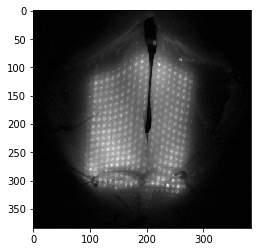

In [10]:
plt.imshow(X[0,:,:,0], cmap="gray")

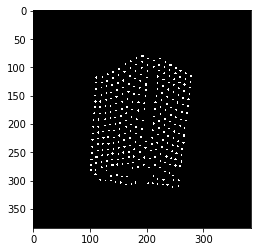

In [11]:
plt.imshow(y[0,:,:,0], cmap="gray")

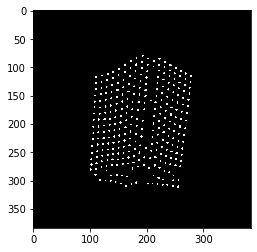

In [12]:
plt.imshow(y_pred[0,:,:,0], cmap="gray")

In [13]:
plt.imsave(save_path + "/y.png",y[0,:,:,0], cmap="gray")

In [14]:
plt.imsave(save_path + "/y_pred.png",y_pred[0,:,:,0], cmap="gray")